<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Decision-Tree-Classification" data-toc-modified-id="Decision-Tree-Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decision Tree Classification</a></span></li><li><span><a href="#Decision-Tree-Visualization" data-toc-modified-id="Decision-Tree-Visualization-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decision Tree Visualization</a></span></li><li><span><a href="#Make-Predictions" data-toc-modified-id="Make-Predictions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make Predictions</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Loans_Dataset.csv', sep= ',')

## Exploratory Data Analysis

In [3]:
print ("Dataset Lenght: ", len(df))
print ("Dataset Shape: ", df.shape)

Dataset Lenght:  1000
Dataset Shape:  (1000, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1000 non-null   int64 
 1   last_payment     1000 non-null   int64 
 2   credit_score     1000 non-null   int64 
 3   house_number     1000 non-null   int64 
 4   sum              1000 non-null   int64 
 5   result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [5]:
df

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No


## Data Transformation

In [6]:
df.drop(columns=['sum'], inplace=True)

In [7]:
df["result"] = np.where(df["result"] == "yes", 1, 0)

In [8]:
X = df.drop(columns=['result'])
Y = df['result']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

## Decision Tree Classification

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [10]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy",
                                     random_state = 100,
                                     max_depth=3,
                                     min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [11]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [12]:
print('Training set score: {:.2f}'.format(clf_entropy.score(X_train, y_train)))
print('Test set score: {:.2f}'.format(clf_entropy.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.94


Here, the training-set accuracy score is 0.96 while the test-set accuracy to be 0.94. These two values are quite comparable. So, there is no sign of overfitting.

## Decision Tree Visualization

[Text(446.4, 380.52, 'X[1] <= 12545.0\nentropy = 0.997\nsamples = 700\nvalue = [374, 326]'),
 Text(223.2, 271.8, 'X[1] <= 11566.5\nentropy = 0.534\nsamples = 345\nvalue = [42, 303]'),
 Text(111.6, 163.07999999999998, 'X[0] <= 485.5\nentropy = 0.045\nsamples = 204\nvalue = [1, 203]'),
 Text(55.8, 54.360000000000014, 'entropy = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(167.39999999999998, 54.360000000000014, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(334.79999999999995, 163.07999999999998, 'X[3] <= 4343.5\nentropy = 0.87\nsamples = 141\nvalue = [41, 100]'),
 Text(279.0, 54.360000000000014, 'entropy = 0.302\nsamples = 93\nvalue = [5, 88]'),
 Text(390.59999999999997, 54.360000000000014, 'entropy = 0.811\nsamples = 48\nvalue = [36, 12]'),
 Text(669.5999999999999, 271.8, 'X[1] <= 13235.5\nentropy = 0.346\nsamples = 355\nvalue = [332, 23]'),
 Text(558.0, 163.07999999999998, 'X[3] <= 3588.5\nentropy = 0.788\nsamples = 89\nvalue = [68, 21]'),
 Text(502.2, 54.360000000000014, 'en

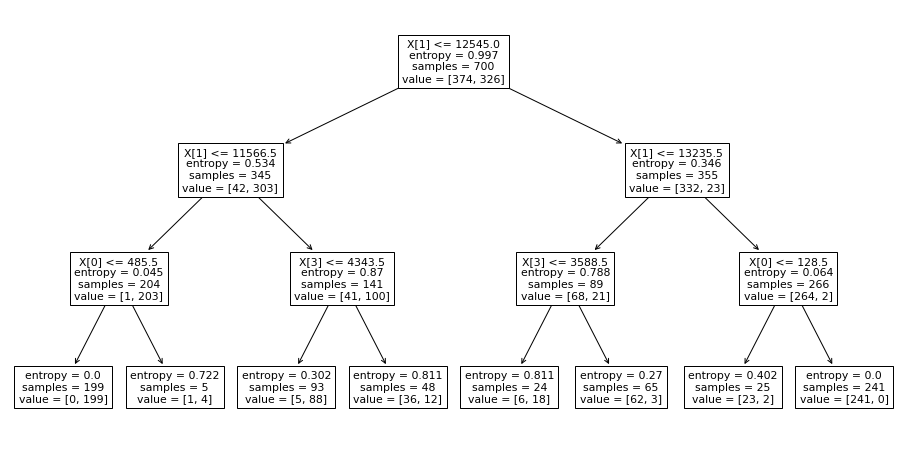

In [13]:
plt.figure(figsize=(16,8))

tree.plot_tree(clf_entropy.fit(X_train, y_train)) 

## Make Predictions

In [14]:
client = np.array([[168, 14798, 834, 4937]])

In [15]:
clf_entropy.predict(client)

array([0])